2)Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

Load Data

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment 3/Flowers-Dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3293 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment 3/Flowers-Dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

3)Create Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

4)Add Layers

a)Convolution Layer

In [ ]:
model.add(Convolution2D(32,(3,3),kernel_initializer="random_uniform",activation="relu",strides=(1,1),input_shape=(64,64,3)))

b)MaxPooling Layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

c)Flatten

In [ ]:
model.add(Flatten())

d)Dense(Hidden layer)

In [ ]:
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(300,activation="relu"))

e)Output layer

In [ ]:
model.add(Dense(5,activation="softmax"))

5)Compile the model

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

6)Fit the model

In [ ]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
138/138 [==============================] - 29s 205ms/step - loss: 0.0980 - accuracy: 0.9712 - val_loss: 2.5114 - val_accuracy: 0.6560
Epoch 2/5
138/138 [==============================] - 26s 190ms/step - loss: 0.1125 - accuracy: 0.9623 - val_loss: 2.1169 - val_accuracy: 0.6735
Epoch 3/5
138/138 [==============================] - 26s 190ms/step - loss: 0.0765 - accuracy: 0.9787 - val_loss: 1.8115 - val_accuracy: 0.7213
Epoch 4/5
138/138 [==============================] - 27s 193ms/step - loss: 0.0675 - accuracy: 0.9757 - val_loss: 1.8917 - val_accuracy: 0.7160
Epoch 5/5
138/138 [==============================] - 26s 192ms/step - loss: 0.0841 - accuracy: 0.9745 - val_loss: 2.0121 - val_accuracy: 0.7183


7)Save the model

In [ ]:
model.save("Flowers.h5")

8)Test the model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model("Flowers.h5")

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/Assignment 3/Flowers-Dataset/Testing/daisy/14333681205_a07c9f1752_m.jpg",target_size=(64,64))

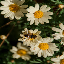

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred=model.predict(x)

In [ ]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
index[np.argmax(pred)]

'daisy'